# Analyzing Real Data

This lesson continues from the previous one and utilizes the final `DataFrame` described there.

In [1]:
import pandas as pd

In [2]:
# This recovers the previously define dataframe
df = pd.read_csv("./data/hot_dogs_data.csv", na_values=-9, index_col="botid #").drop(columns=[" "])
df.columns = df.columns.str.strip()
df["date"] = pd.to_datetime(df['date mmddyy'], format='%m%d%y')
df = df.drop(columns=["date mmddyy"])
df = df.drop(columns=["no2 nmol/kg"])
df

,press dbar,temp ITS-90,csal PSS-78,coxy umol/kg,ph,phos umol/kg,nit umol/kg,doc umol/kg,hbact #*1e5/ml,pbact #*1e5/ml,sbact #*1e5/ml,date
botid #,,,,,,,,,,,,
2190200124,5.5,23.0629,35.2514,214.1,NaN,0.10,0.03,NaN,NaN,NaN,NaN,2010-03-09
2190200123,59.6,23.0670,35.2506,214.6,NaN,0.11,0.06,NaN,NaN,NaN,NaN,2010-03-09
2190200122,90.7,21.7697,35.1897,213.4,NaN,0.12,0.08,NaN,NaN,NaN,NaN,2010-03-09
2190200121,119.4,20.7957,35.1666,208.5,NaN,0.15,0.50,NaN,NaN,NaN,NaN,2010-03-09
2190200120,153.6,20.1517,35.2192,204.6,NaN,0.15,1.15,NaN,NaN,NaN,NaN,2010-03-09
...,...,...,...,...,...,...,...,...,...,...,...,...
3170200706,147.8,21.9505,34.9545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-20
3170200705,147.7,21.9577,34.9530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-20
3170200704,173.4,20.3973,35.0368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-20


### Questions
* How do you visualize data from a `DataFrame`?
* How do you group data by year and month?
* How do you plot multiple measurements in a single plot?

### Objectives
* Learn how to plot the cleaned data.
* Learn how to subset and plot the data.
* Learn how to use the groupby method to visualize information.

Before we get started on our analysis let us take stock of how much data we have for the various columns. To do this we can use two `DataFrame` methods that we've previously used.

First we can check how many rows of data we have in total. We can check this easily through the shape attribute of the `DataFrame`

In [3]:
df.shape

(21222, 12)

From this we can see that we have 21,222 rows in our data and 13 columns. So at most we can have 21,222 rows of data for each column. However, as we saw during the cleaning phase there are `NaN` values in our dataset so many of our columns won't contain data in every row.

To check how many rows of data we have for each column we can again use the `describe()` method. It will count how many row of data are **not** `NaN` for each column. To reduce the size of the output we will extract the row indexed with the label `count`. This will provide the counts across all the columns of the data.

In [8]:
df.describe().loc["count"]

press dbar        21222.0
temp ITS-90       21222.0
csal PSS-78       21210.0
coxy umol/kg       3727.0
ph                  885.0
phos umol/kg       2259.0
nit umol/kg        2253.0
doc umol/kg         868.0
hbact #*1e5/ml      750.0
pbact #*1e5/ml      749.0
sbact #*1e5/ml      750.0
Name: count, dtype: float64

As we can see, we have highly variable number of samples for each column. Ignoring pressure, since it is roughly a depth estimate, the remaining columns fit neatly into three groups:

1. Data that is found in almost all rows
   - Temperature
   - Salinity
2. Data that is found in around 2000-4000 samples
   - Oxygen
   - Phosphorus
   - Nitrate+Nitrite
3. Data that is found in fewer than 1000 samples
   - pH
   - Dissolved organic carbon
   - Heterotrophic bacteria
   - Prochlorococcus
   - Synechococcus



### `GroupBy` and Visualization

To start off we can focus on the measurements that we have plenty of data for. 

### Plotting Temperature

We can quickly get a matplotlib visualization for temperature by calling the `plot` method from our `DataFrame`. We can tell it what columns we want to use as the x axis and y axis via the parameters `x` and `y`. The `kind` parameter lets the `plot()` method know what kind of plot we want e.g. line or scatter. For more information about the plot function check out the docs ([Link to plot method docs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)).

<AxesSubplot: xlabel='date'>

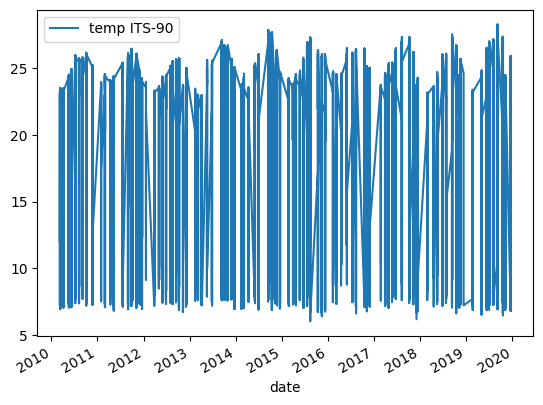

In [47]:
df.plot(x="date", y="temp ITS-90", kind="line")

However, the plot we get is very messy. We see a lot of variation from around 25°C to 7°C year to year and the dots are clustered very tightly together.


### Plotting Surface Temperature

Part of the reason we got this messy plot is because we are utilizing all the temperature values in our dataset, regardless of depth (i.e. pressure). To resolve some of the variation we can ask Pandas to only plot data that is from roughly the top 100m of the water column this would be roughly any rows that come from pressures of less than 100 dbar.

<AxesSubplot: xlabel='date', ylabel='temp ITS-90'>

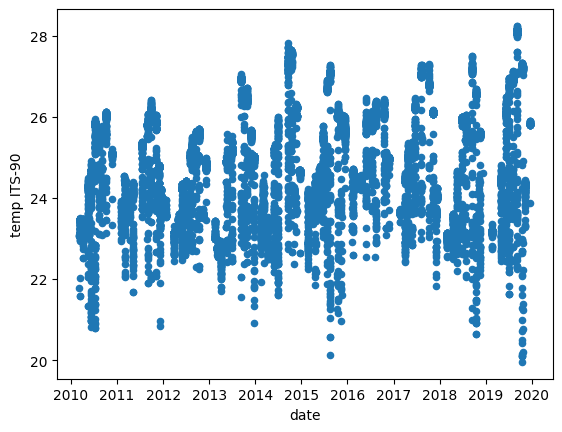

In [16]:
surface_samples = df[df["press dbar"] < 100]
surface_samples.plot(x="date", y="temp ITS-90", kind="scatter")

Now we can see that we have removed some of the variation we saw in the previous figure (data ranges roughly between 20 and 28 instead of 5 and 28 in the previous plot). However, it is still somewhat difficult to make out any trends in the data. One way of dealing with this would be to e.g. get the average temperature for each year and then plot those results.

To this we will introduce a new method called `groupby` which allows us to run calculations like `mean()` on groups we specify. For us we want to get the mean temperature for each year. Thanks to our previous work in setting up the date column type this is very easy. We can also reuse `surface_samples` to only get samples from the upper 100m of the water column.

In [44]:
grouped_surface_samples = surface_samples.groupby(df.date.dt.year)["temp ITS-90"].mean()
grouped_surface_samples

date
2010    24.438342
2011    24.545986
2012    24.286195
2013    24.449899
2014    24.755485
2015    24.799153
2016    24.940249
2017    24.836940
2018    24.580730
2019    25.087561
Name: temp ITS-90, dtype: float64

We see now that the new `DataFrame` generated by `groupby()` and `mean()` contains the mean for each year for each of our columns. 

### Exercise 1: Plotting Yearly Surface Temperature

Can you plot the yearly surface temperature from grouped_surface_samples. 
1. Use the `plot` method on `grouped_surface_samples` 
2. Modify `plot` so that it uses lines instead of scatter.
3. The resulting plot should look like the one below.


<AxesSubplot: xlabel='date'>

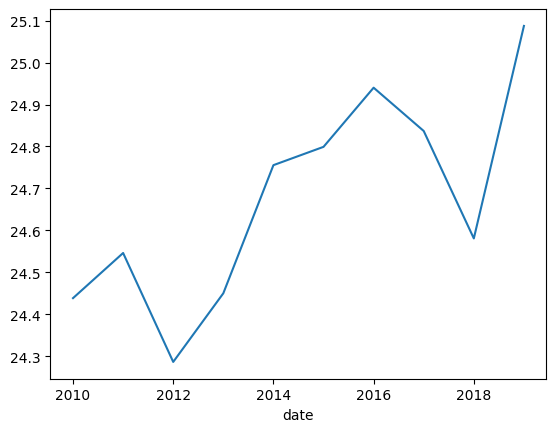

<AxesSubplot: xlabel='date'>

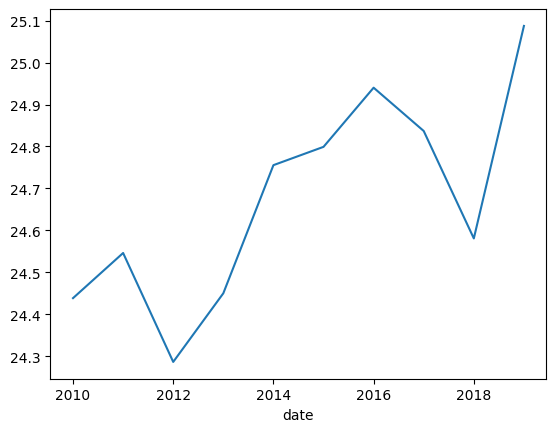

In [45]:
### Solution

grouped_surface_samples.plot(x="date", kind="line")

Now it looks a lot smoother, but now we have another issue. We've smoothed out any month to month variations that are present in the data. To fix this we can instead use the `groupby` method to group by year and month.

In [38]:
grouped_surface_samples = surface_samples.groupby([surface_samples.date.dt.year,surface_samples.date.dt.month])["temp ITS-90"].mean()
grouped_surface_samples

date  date
2010  3       23.316618
      4       23.231985
      5       23.787439
      6       23.620556
      7       24.834982
                ...    
2019  8       26.006258
      9       26.412903
      10      25.590081
      11      24.217688
      12      25.790132
Name: temp ITS-90, Length: 94, dtype: float64

### Plotting Monthly Surface Temperature

If we plot this we get a month by month plot of temperature variations.

<AxesSubplot:xlabel='date,date'>

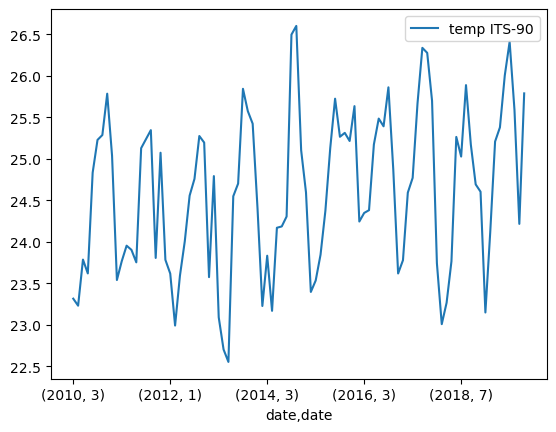

In [11]:
grouped_surface_samples.plot(y="temp ITS-90", kind="line")

While we have been focusing on temperature there is no reason that we can't redo the same plots that we have been making with measurements other than temperature. We can also plot multiple measurements at the same time if we want to as well.


### Exercise 2: Synthesis

Reuse the code above to produce the monthly median (not average as computed above) for the `press dbar` variable.

<AxesSubplot: xlabel='date,date'>

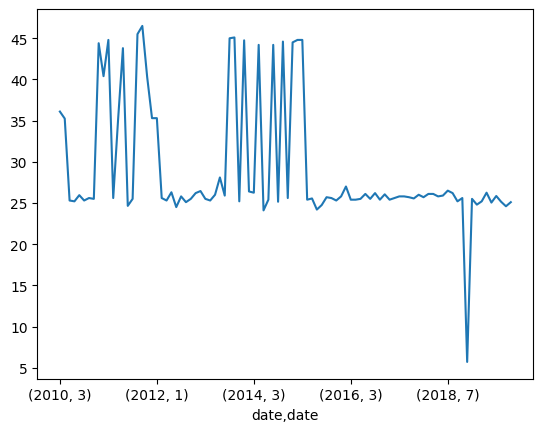

### Key Points

* Grouping data by year and months is a powerful way to identify monthly and yearly changes.
* You can easily add more measurements to a single plot by using a list.

### For more information

There is a lot we didn't cover in this workshop. To go farther, take a look at the Matplotlib docs ([Link to Matplotlib docs](https://matplotlib.org/)) and other libraries that can allow you to make dynamic plots e.g. Plotly ([Link to Plotly docs](https://plotly.com/graphing-libraries/))"


In [ ]:
### Solutions    

In [ ]:
## Exercise 1:
grouped_surface_samples = surface_samples.groupby(df.date.dt.year)["temp ITS-90"].mean()
grouped_surface_samples.plot(x="date", kind="line")

In [ ]:
## Exercise 2:
median_vals = surface_samples[["date", "press dbar"]].groupby([surface_samples.date.dt.year,surface_samples.date.dt.month])["press dbar"].median()
median_vals.plot(y="press dbar", kind="line")